# Time Series Decomposition

In [1]:
# to handle datasets
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import MSTL

In [2]:
# load dataset
data = pd.read_csv("portfolio_data.csv")

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1520, 5)


,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [3]:
data['Date'] = pd.to_datetime(data['Date'])

## Temporal Variables

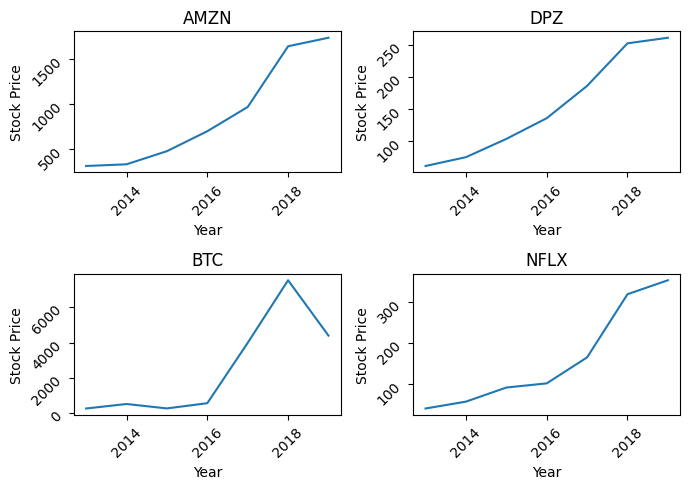

In [5]:
# Prices vs Year

year = data.Date.dt.year

fig, axs = plt.subplots(2, 2, figsize=(7,5))

data.groupby(year)["AMZN"].mean().plot(ax=axs[0, 0])
axs[0, 0].set_title('AMZN')
axs[0, 0].set_ylabel('Stock Price')
axs[0, 0].set_xlabel('Year')
axs[0, 0].tick_params(labelrotation=45)

data.groupby(year)["DPZ"].mean().plot(ax=axs[0, 1])
axs[0, 1].set_title('DPZ')
axs[0, 1].set_ylabel('Stock Price')
axs[0, 1].set_xlabel('Year')
axs[0, 1].tick_params(labelrotation=45)

data.groupby(year)["BTC"].mean().plot(ax=axs[1, 0])
axs[1, 0].set_title('BTC')
axs[1, 0].set_ylabel('Stock Price')
axs[1, 0].set_xlabel('Year')
axs[1, 0].tick_params(labelrotation=45)

data.groupby(year)["NFLX"].mean().plot(ax=axs[1, 1])
axs[1, 1].set_title('NFLX')
axs[1, 1].set_ylabel('Stock Price')
axs[1, 1].set_xlabel('Year')
axs[1, 1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

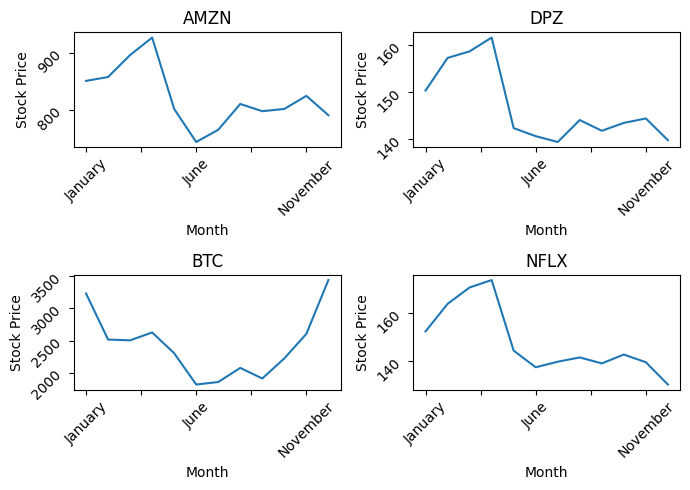

In [6]:
# Prices vs Month

month = data.Date.dt.month

months_dict={1: "January",
             2: "February",
             3: "March",
             4: "May",
             5: "April",
             6: "June",
             7: "July",
             8: "August",
             9: "September",
             10: "October",
             11: "November",
             12: "December"}

fig, axs = plt.subplots(2, 2, figsize=(7,5))

data.groupby(month)["AMZN"].mean().rename(index=months_dict).plot(ax=axs[0, 0])
axs[0, 0].set_title('AMZN')
axs[0, 0].set_ylabel('Stock Price')
axs[0, 0].set_xlabel('Month')
axs[0, 0].tick_params(labelrotation=45)

data.groupby(month)["DPZ"].mean().rename(index=months_dict).plot(ax=axs[0, 1])
axs[0, 1].set_title('DPZ')
axs[0, 1].set_ylabel('Stock Price')
axs[0, 1].set_xlabel('Month')
axs[0, 1].tick_params(labelrotation=45)

data.groupby(month)["BTC"].mean().rename(index=months_dict).plot(ax=axs[1, 0])
axs[1, 0].set_title('BTC')
axs[1, 0].set_ylabel('Stock Price')
axs[1, 0].set_xlabel('Month')
axs[1, 0].tick_params(labelrotation=45)

data.groupby(month)["NFLX"].mean().rename(index=months_dict).plot(ax=axs[1, 1])
axs[1, 1].set_title('NFLX')
axs[1, 1].set_ylabel('Stock Price')
axs[1, 1].set_xlabel('Month')
axs[1, 1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

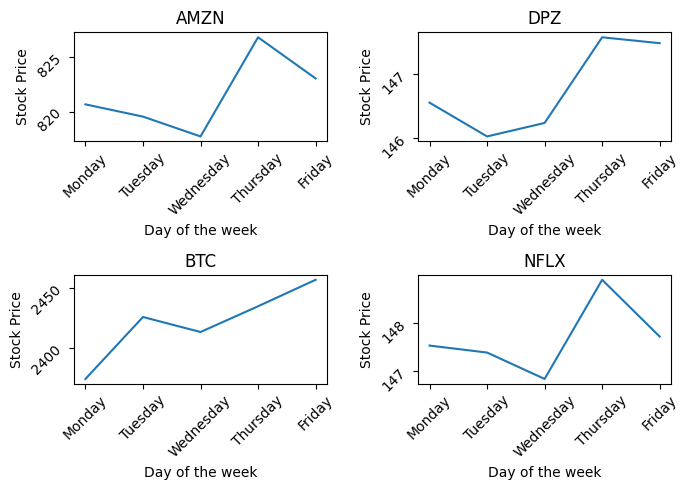

In [7]:
# Prices vs Day of the week

dayofweek = data.Date.dt.dayofweek

dayofweek_dict={0: "Monday",
                1: "Tuesday",
                2: "Wednesday",
                3: "Thursday",
                4: "Friday"}

fig, axs = plt.subplots(2, 2, figsize=(7,5))

data.groupby(dayofweek)["AMZN"].mean().rename(index=dayofweek_dict).plot(ax=axs[0, 0])
axs[0, 0].set_title('AMZN')
axs[0, 0].set_ylabel('Stock Price')
axs[0, 0].set_xlabel('Day of the week')
axs[0, 0].tick_params(labelrotation=45)

data.groupby(dayofweek)["DPZ"].mean().rename(index=dayofweek_dict).plot(ax=axs[0, 1])
axs[0, 1].set_title('DPZ')
axs[0, 1].set_ylabel('Stock Price')
axs[0, 1].set_xlabel('Day of the week')
axs[0, 1].tick_params(labelrotation=45)

data.groupby(dayofweek)["BTC"].mean().rename(index=dayofweek_dict).plot(ax=axs[1, 0])
axs[1, 0].set_title('BTC')
axs[1, 0].set_ylabel('Stock Price')
axs[1, 0].set_xlabel('Day of the week')
axs[1, 0].tick_params(labelrotation=45)

data.groupby(dayofweek)["NFLX"].mean().rename(index=dayofweek_dict).plot(ax=axs[1, 1])
axs[1, 1].set_title('NFLX')
axs[1, 1].set_ylabel('Stock Price')
axs[1, 1].set_xlabel('Day of the week')
axs[1, 1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

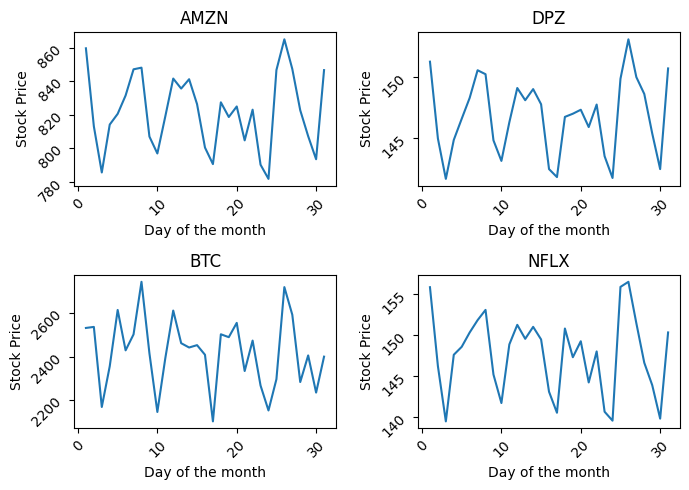

In [8]:
# Prices vs Day of the week

day = data.Date.dt.day

fig, axs = plt.subplots(2, 2, figsize=(7,5))

data.groupby(day)["AMZN"].mean().plot(ax=axs[0, 0])
axs[0, 0].set_title('AMZN')
axs[0, 0].set_ylabel('Stock Price')
axs[0, 0].set_xlabel('Day of the month')
axs[0, 0].tick_params(labelrotation=45)

data.groupby(day)["DPZ"].mean().plot(ax=axs[0, 1])
axs[0, 1].set_title('DPZ')
axs[0, 1].set_ylabel('Stock Price')
axs[0, 1].set_xlabel('Day of the month')
axs[0, 1].tick_params(labelrotation=45)

data.groupby(day)["BTC"].mean().plot(ax=axs[1, 0])
axs[1, 0].set_title('BTC')
axs[1, 0].set_ylabel('Stock Price')
axs[1, 0].set_xlabel('Day of the month')
axs[1, 0].tick_params(labelrotation=45)

data.groupby(day)["NFLX"].mean().plot(ax=axs[1, 1])
axs[1, 1].set_title('NFLX')
axs[1, 1].set_ylabel('Stock Price')
axs[1, 1].set_xlabel('Day of the month')
axs[1, 1].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()

## Time Serie Decomposition

In [9]:
timeseries = data.copy()

# Compute date time variables used later in plotting
timeseries["day_of_week"] = timeseries.Date.dt.dayofweek
timeseries["week"] = timeseries.Date.dt.isocalendar().week
timeseries["day_of_month"] = timeseries.Date.dt.day
timeseries["month"] = timeseries.Date.dt.month
timeseries["year"] = timeseries.Date.dt.year

timeseries = timeseries.set_index("Date")

timeseries.head()

,AMZN,DPZ,BTC,NFLX,day_of_week,week,day_of_month,month,year
Date,,,,,,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714,2,18,1,5,2013
2013-05-02,252.550003,51.987320,98.099998,30.641428,3,18,2,5,2013
2013-05-03,258.049988,52.446388,112.900002,30.492857,4,18,3,5,2013
2013-05-06,255.720001,53.205257,109.599998,30.098572,0,19,6,5,2013
2013-05-07,257.730011,54.151505,113.199997,29.464285,1,19,7,5,2013


In [12]:
round(timeseries.groupby(["year", "month"]).AMZN.count().mean(),2)

20.82

In [31]:
mstl = MSTL(timeseries["AMZN"], periods=(5, 21), stl_kwargs={"seasonal_deg": 0})
res = mstl.fit()

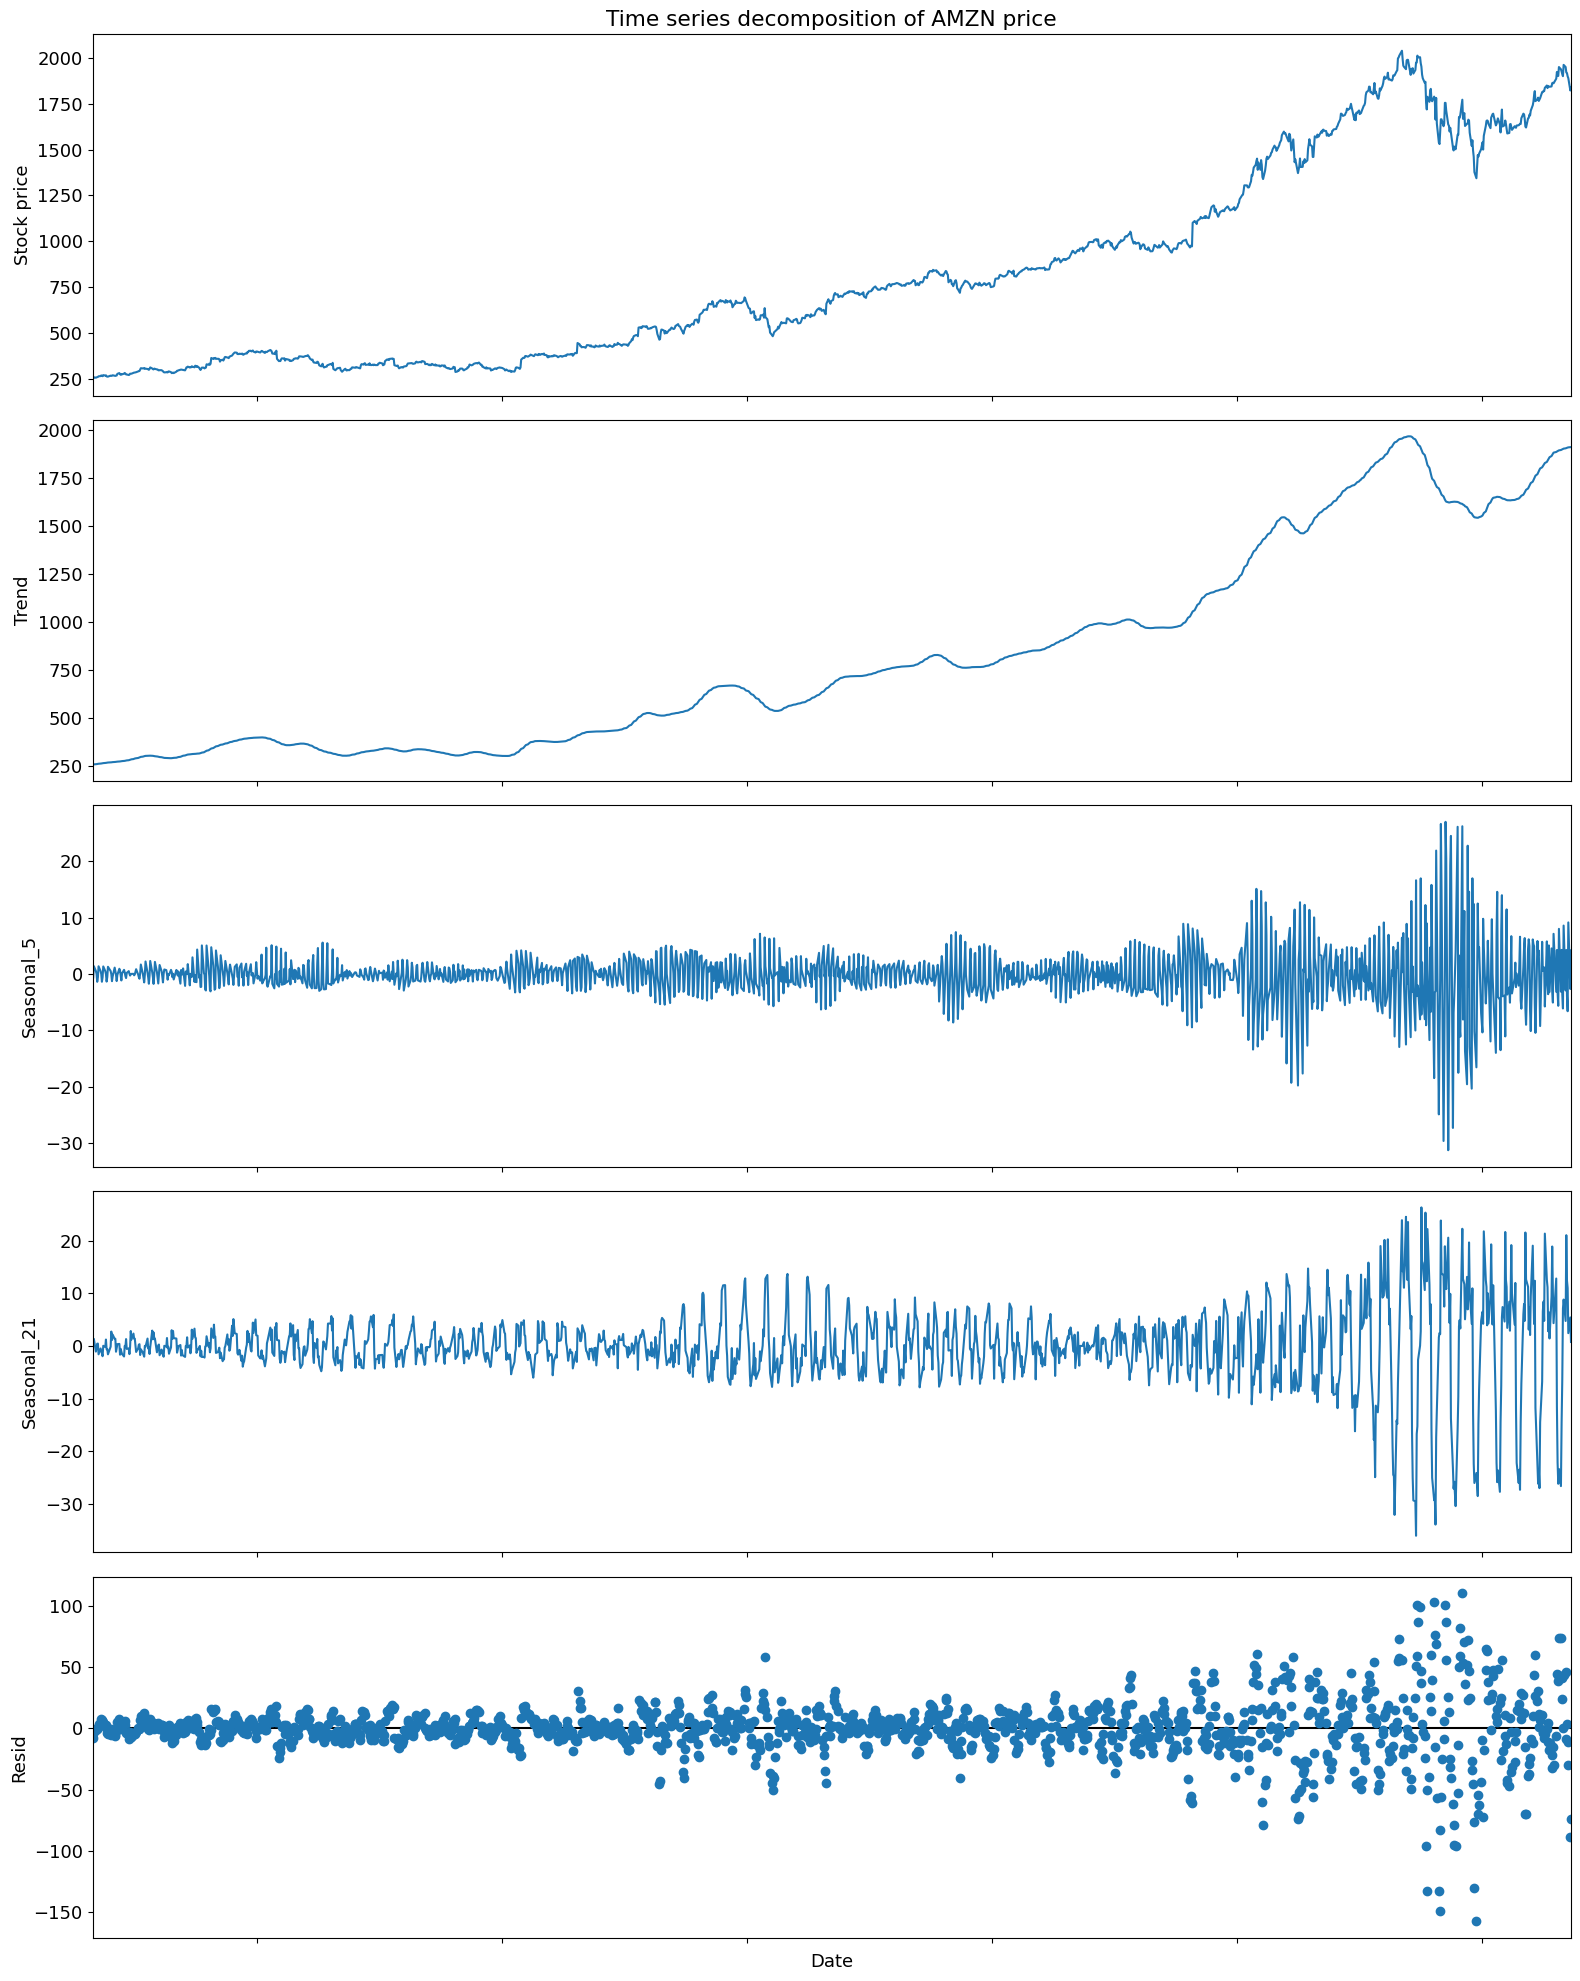

In [32]:
# Start with the plot from the results object `res`
plt.rc("figure", figsize=(16, 20))
plt.rc("font", size=13)
fig = res.plot()

# Make plot pretty
axs = fig.get_axes()

ax_last = axs[-1]
plt.setp(ax_last.get_xticklabels(), rotation=0, horizontalalignment="center")
for ax in axs[:-1]:
    ax.get_shared_x_axes().joined(ax, ax_last)
    ax.set_xticklabels([])
axs[0].set_ylabel("Stock price")
axs[0].set_title("Time series decomposition of AMZN price")
ax_last.set_xlabel("Date")

plt.tight_layout()

In [33]:
# Compute residuals
ts_c = timeseries.copy()
ts_c["residual"] = res.resid

# Compute inter-quartile range
Q1 = ts_c["residual"].quantile(0.25)
Q3 = ts_c["residual"].quantile(0.75)
IQR = Q3 - Q1

# Apply 1.5 IQR as a threshold to identify outliers
factor = 1.5
ts_c["lower"] = Q1 - factor * IQR
ts_c["upper"] = Q3 + factor * IQR
ts_c["is_outlier"] = (ts_c["residual"] < (Q1 - factor * IQR)) | (
    ts_c["residual"] > (Q3 + factor * IQR)
)

AMZN_outl = ts_c[ts_c.is_outlier == True][["AMZN", "is_outlier"]]
AMZN_outl

,AMZN,is_outlier
Date,,
2015-08-24,463.369995,True
2015-08-25,466.369995,True
2015-09-28,504.059998,True
2015-09-29,496.070007,True
2016-01-28,635.349976,True
...,...,...
2019-04-30,1926.520020,True
2019-05-03,1962.459961,True
2019-05-06,1950.550049,True


In [34]:
mstl = MSTL(timeseries["DPZ"], periods=(5, 21), stl_kwargs={"seasonal_deg": 0})
res = mstl.fit()

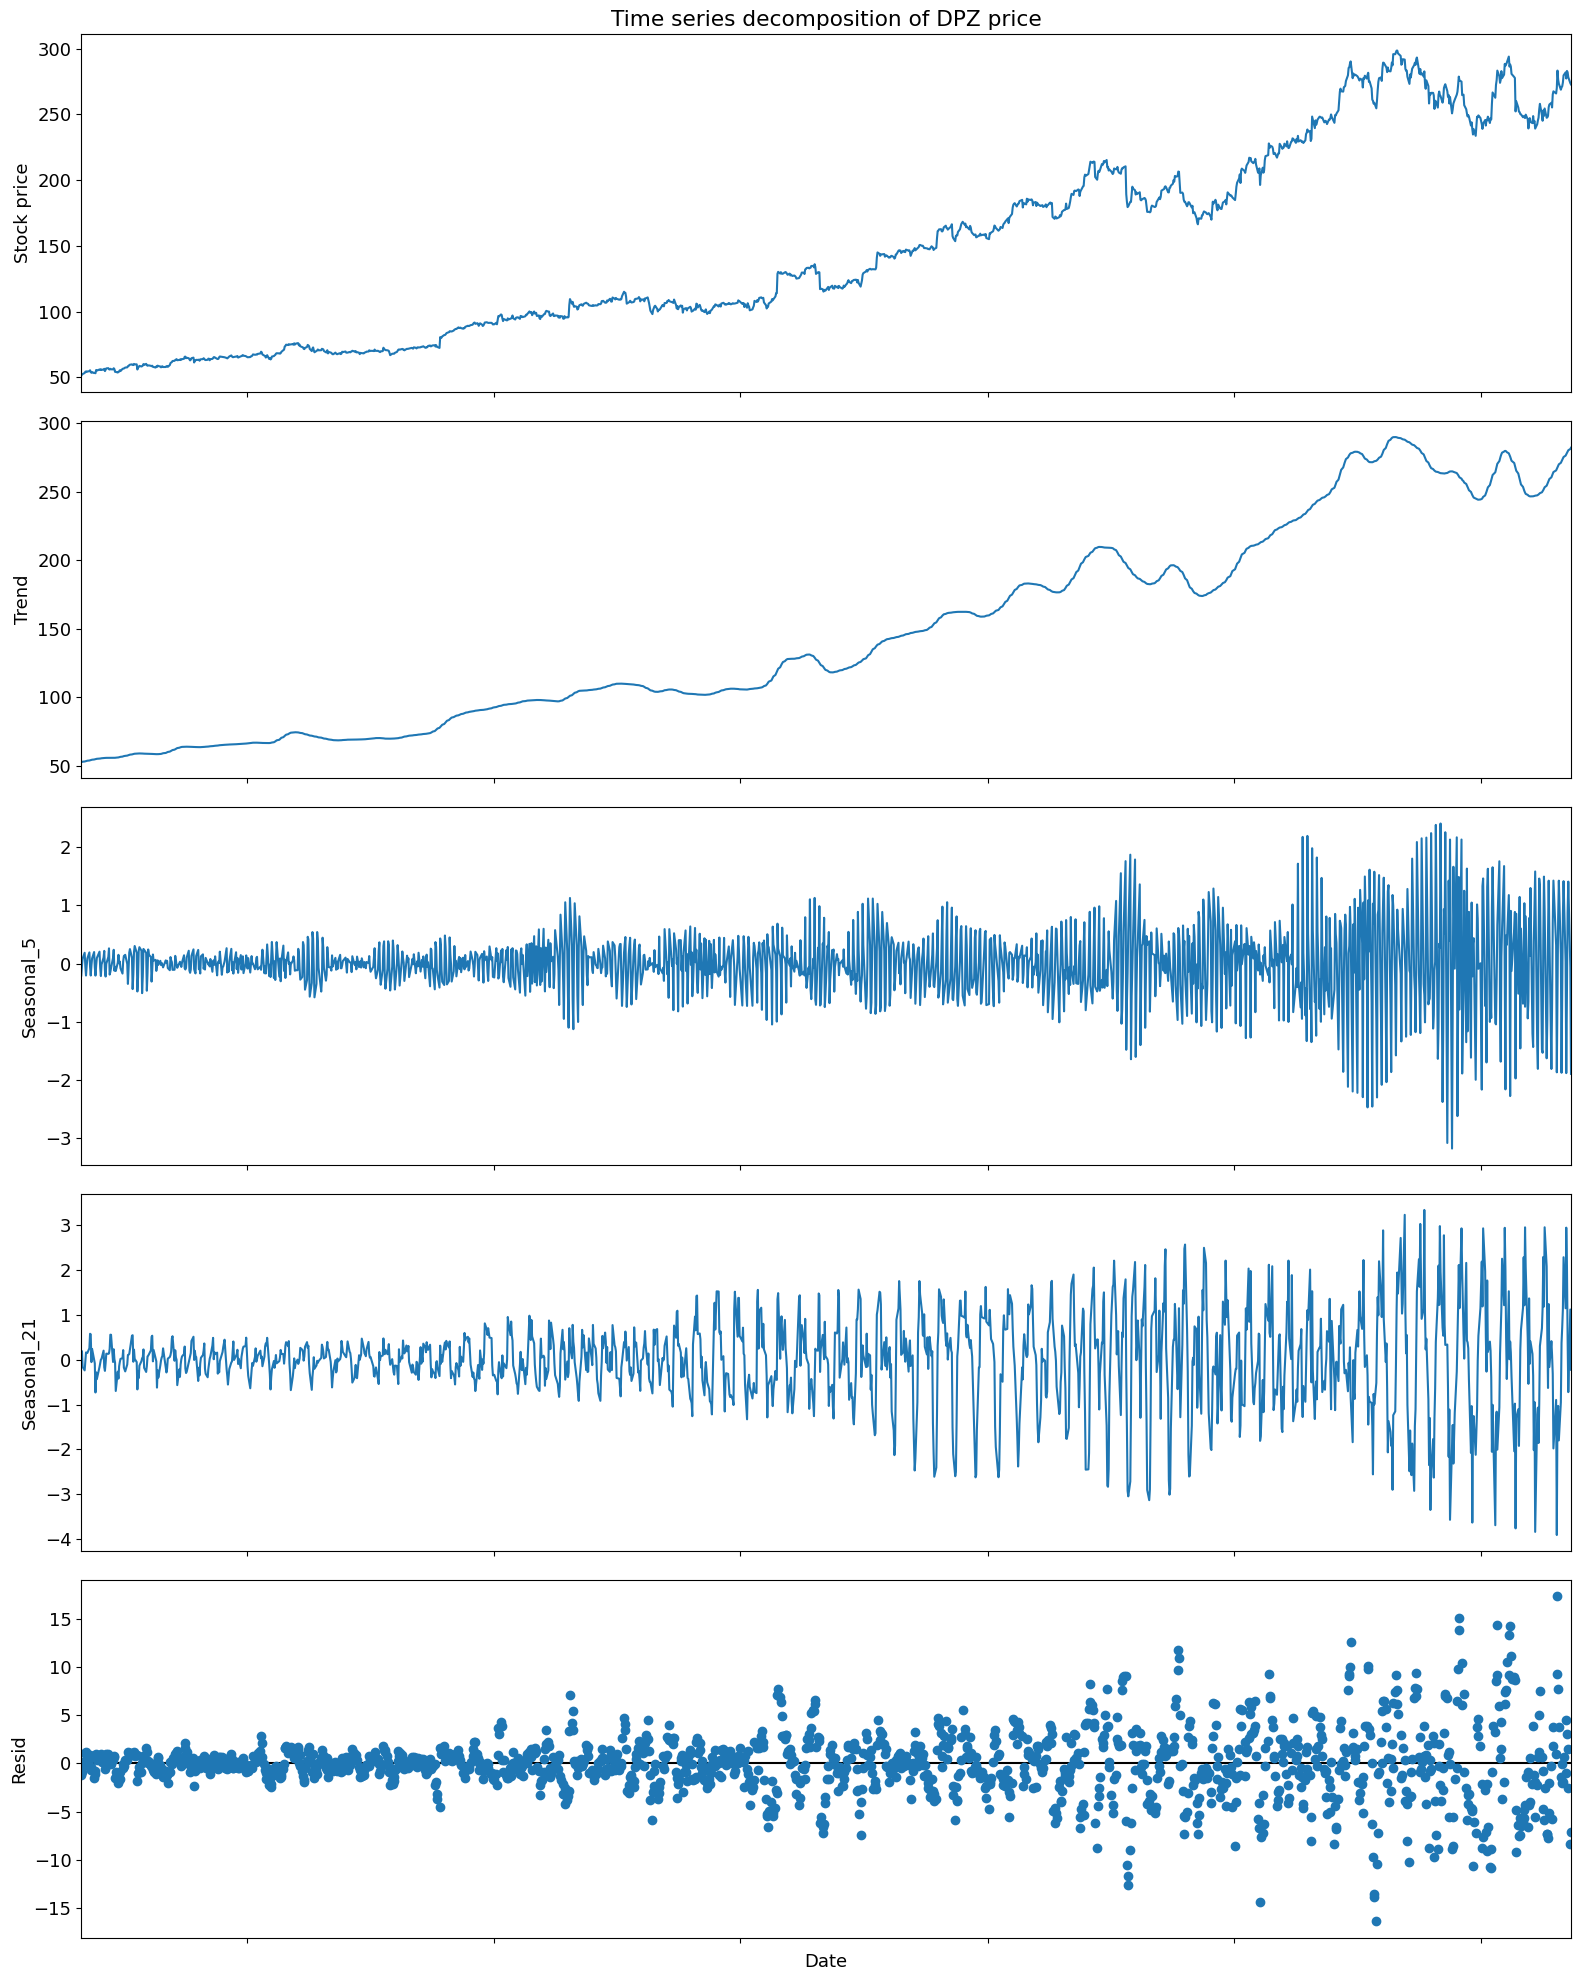

In [35]:
# Start with the plot from the results object `res`
plt.rc("figure", figsize=(16, 20))
plt.rc("font", size=13)
fig = res.plot()

# Make plot pretty
axs = fig.get_axes()

ax_last = axs[-1]
plt.setp(ax_last.get_xticklabels(), rotation=0, horizontalalignment="center")
for ax in axs[:-1]:
    ax.get_shared_x_axes().joined(ax, ax_last)
    ax.set_xticklabels([])
axs[0].set_ylabel("Stock price")
axs[0].set_title("Time series decomposition of DPZ price")
ax_last.set_xlabel("Date")

plt.tight_layout()

In [36]:
# Compute residuals
ts_c = timeseries.copy()
ts_c["residual"] = res.resid

# Compute inter-quartile range
Q1 = ts_c["residual"].quantile(0.25)
Q3 = ts_c["residual"].quantile(0.75)
IQR = Q3 - Q1

# Apply 1.5 IQR as a threshold to identify outliers
factor = 1.5
ts_c["lower"] = Q1 - factor * IQR
ts_c["upper"] = Q3 + factor * IQR
ts_c["is_outlier"] = (ts_c["residual"] < (Q1 - factor * IQR)) | (
    ts_c["residual"] > (Q3 + factor * IQR)
)

DPZ_outl = ts_c[ts_c.is_outlier == True][["DPZ", "is_outlier"]]
DPZ_outl

,DPZ,is_outlier
Date,,
2015-04-24,109.471146,True
2015-08-24,98.041336,True
2016-02-11,103.563492,True
2016-02-25,128.752014,True
2016-02-26,130.195526,True
...,...,...
2019-04-23,270.200012,True
2019-04-24,283.420013,True
2019-04-25,276.450012,True


In [37]:
mstl = MSTL(timeseries["BTC"], periods=(5, 21), stl_kwargs={"seasonal_deg": 0})
res = mstl.fit()

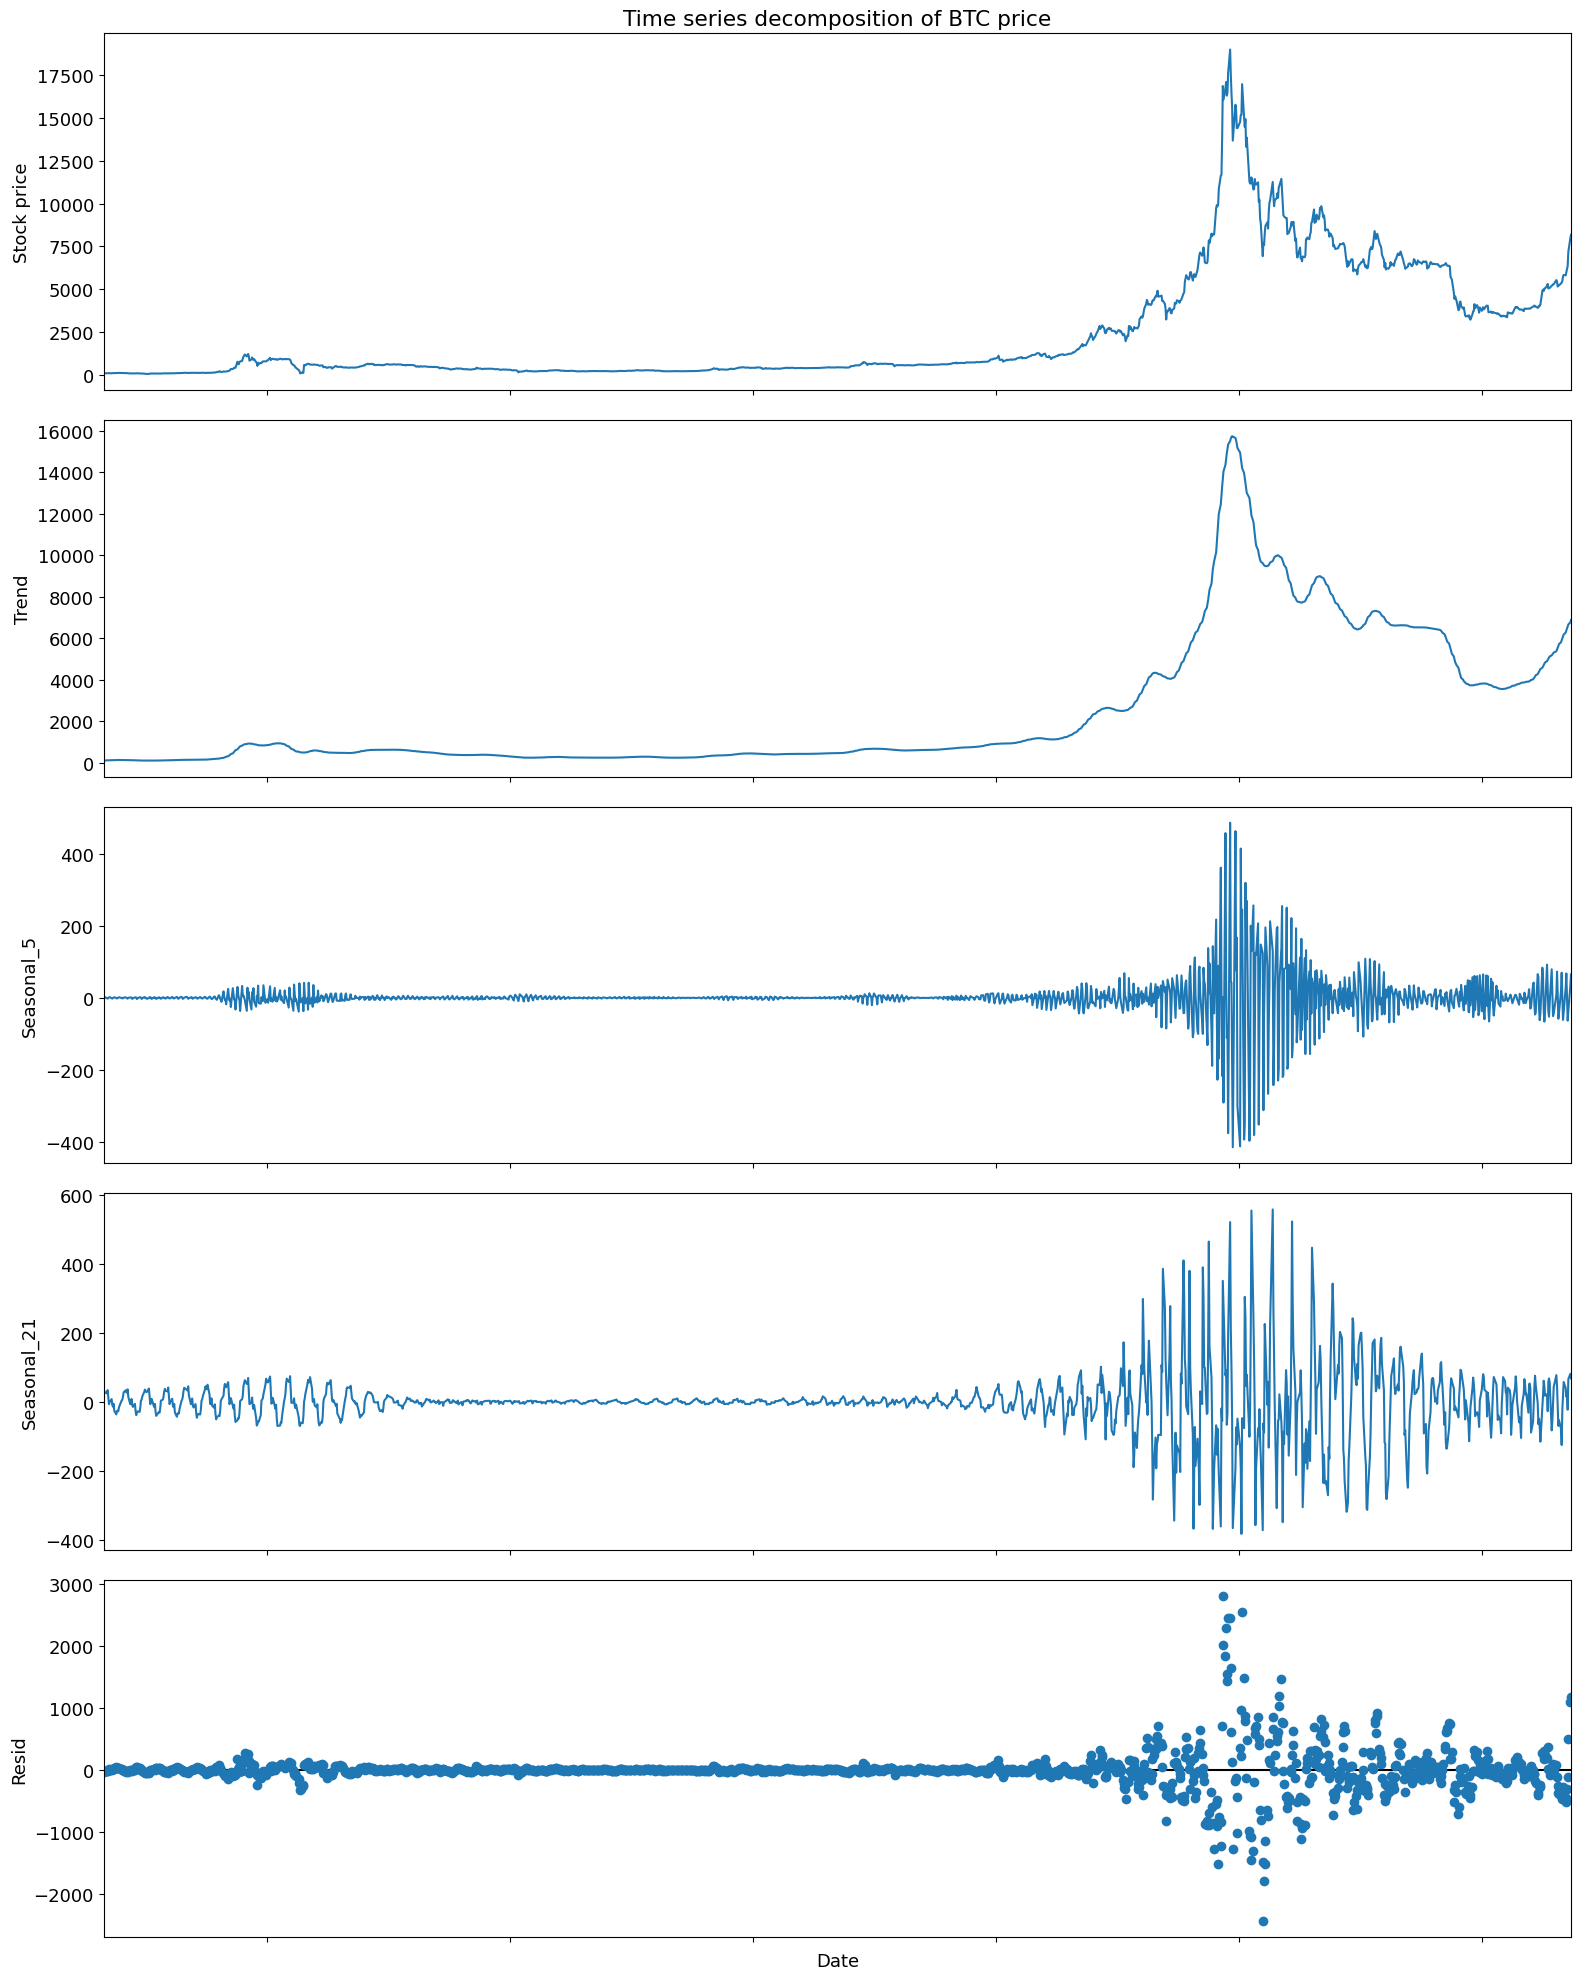

In [38]:
# Start with the plot from the results object `res`
plt.rc("figure", figsize=(16, 20))
plt.rc("font", size=13)
fig = res.plot()

# Make plot pretty
axs = fig.get_axes()

ax_last = axs[-1]
plt.setp(ax_last.get_xticklabels(), rotation=0, horizontalalignment="center")
for ax in axs[:-1]:
    ax.get_shared_x_axes().joined(ax, ax_last)
    ax.set_xticklabels([])
axs[0].set_ylabel("Stock price")
axs[0].set_title("Time series decomposition of BTC price")
ax_last.set_xlabel("Date")

plt.tight_layout()

In [39]:
# Compute residuals
ts_c = timeseries.copy()
ts_c["residual"] = res.resid

# Compute inter-quartile range
Q1 = ts_c["residual"].quantile(0.25)
Q3 = ts_c["residual"].quantile(0.75)
IQR = Q3 - Q1

# Apply 1.5 IQR as a threshold to identify outliers
factor = 1.5
ts_c["lower"] = Q1 - factor * IQR
ts_c["upper"] = Q3 + factor * IQR
ts_c["is_outlier"] = (ts_c["residual"] < (Q1 - factor * IQR)) | (
    ts_c["residual"] > (Q3 + factor * IQR)
)

BTC_outl = ts_c[ts_c.is_outlier == True][["BTC", "is_outlier"]]
BTC_outl

,BTC,is_outlier
Date,,
2013-11-04,238.160004,True
2013-11-18,785.429993,True
2013-11-26,969.960022,True
2013-11-27,1079.890015,True
2013-11-29,1206.930054,True
...,...,...
2019-05-08,6171.959961,True
2019-05-09,6358.290039,True
2019-05-10,7191.359863,True


In [40]:
mstl = MSTL(timeseries["NFLX"], periods=(5, 21), stl_kwargs={"seasonal_deg": 0})
res = mstl.fit()

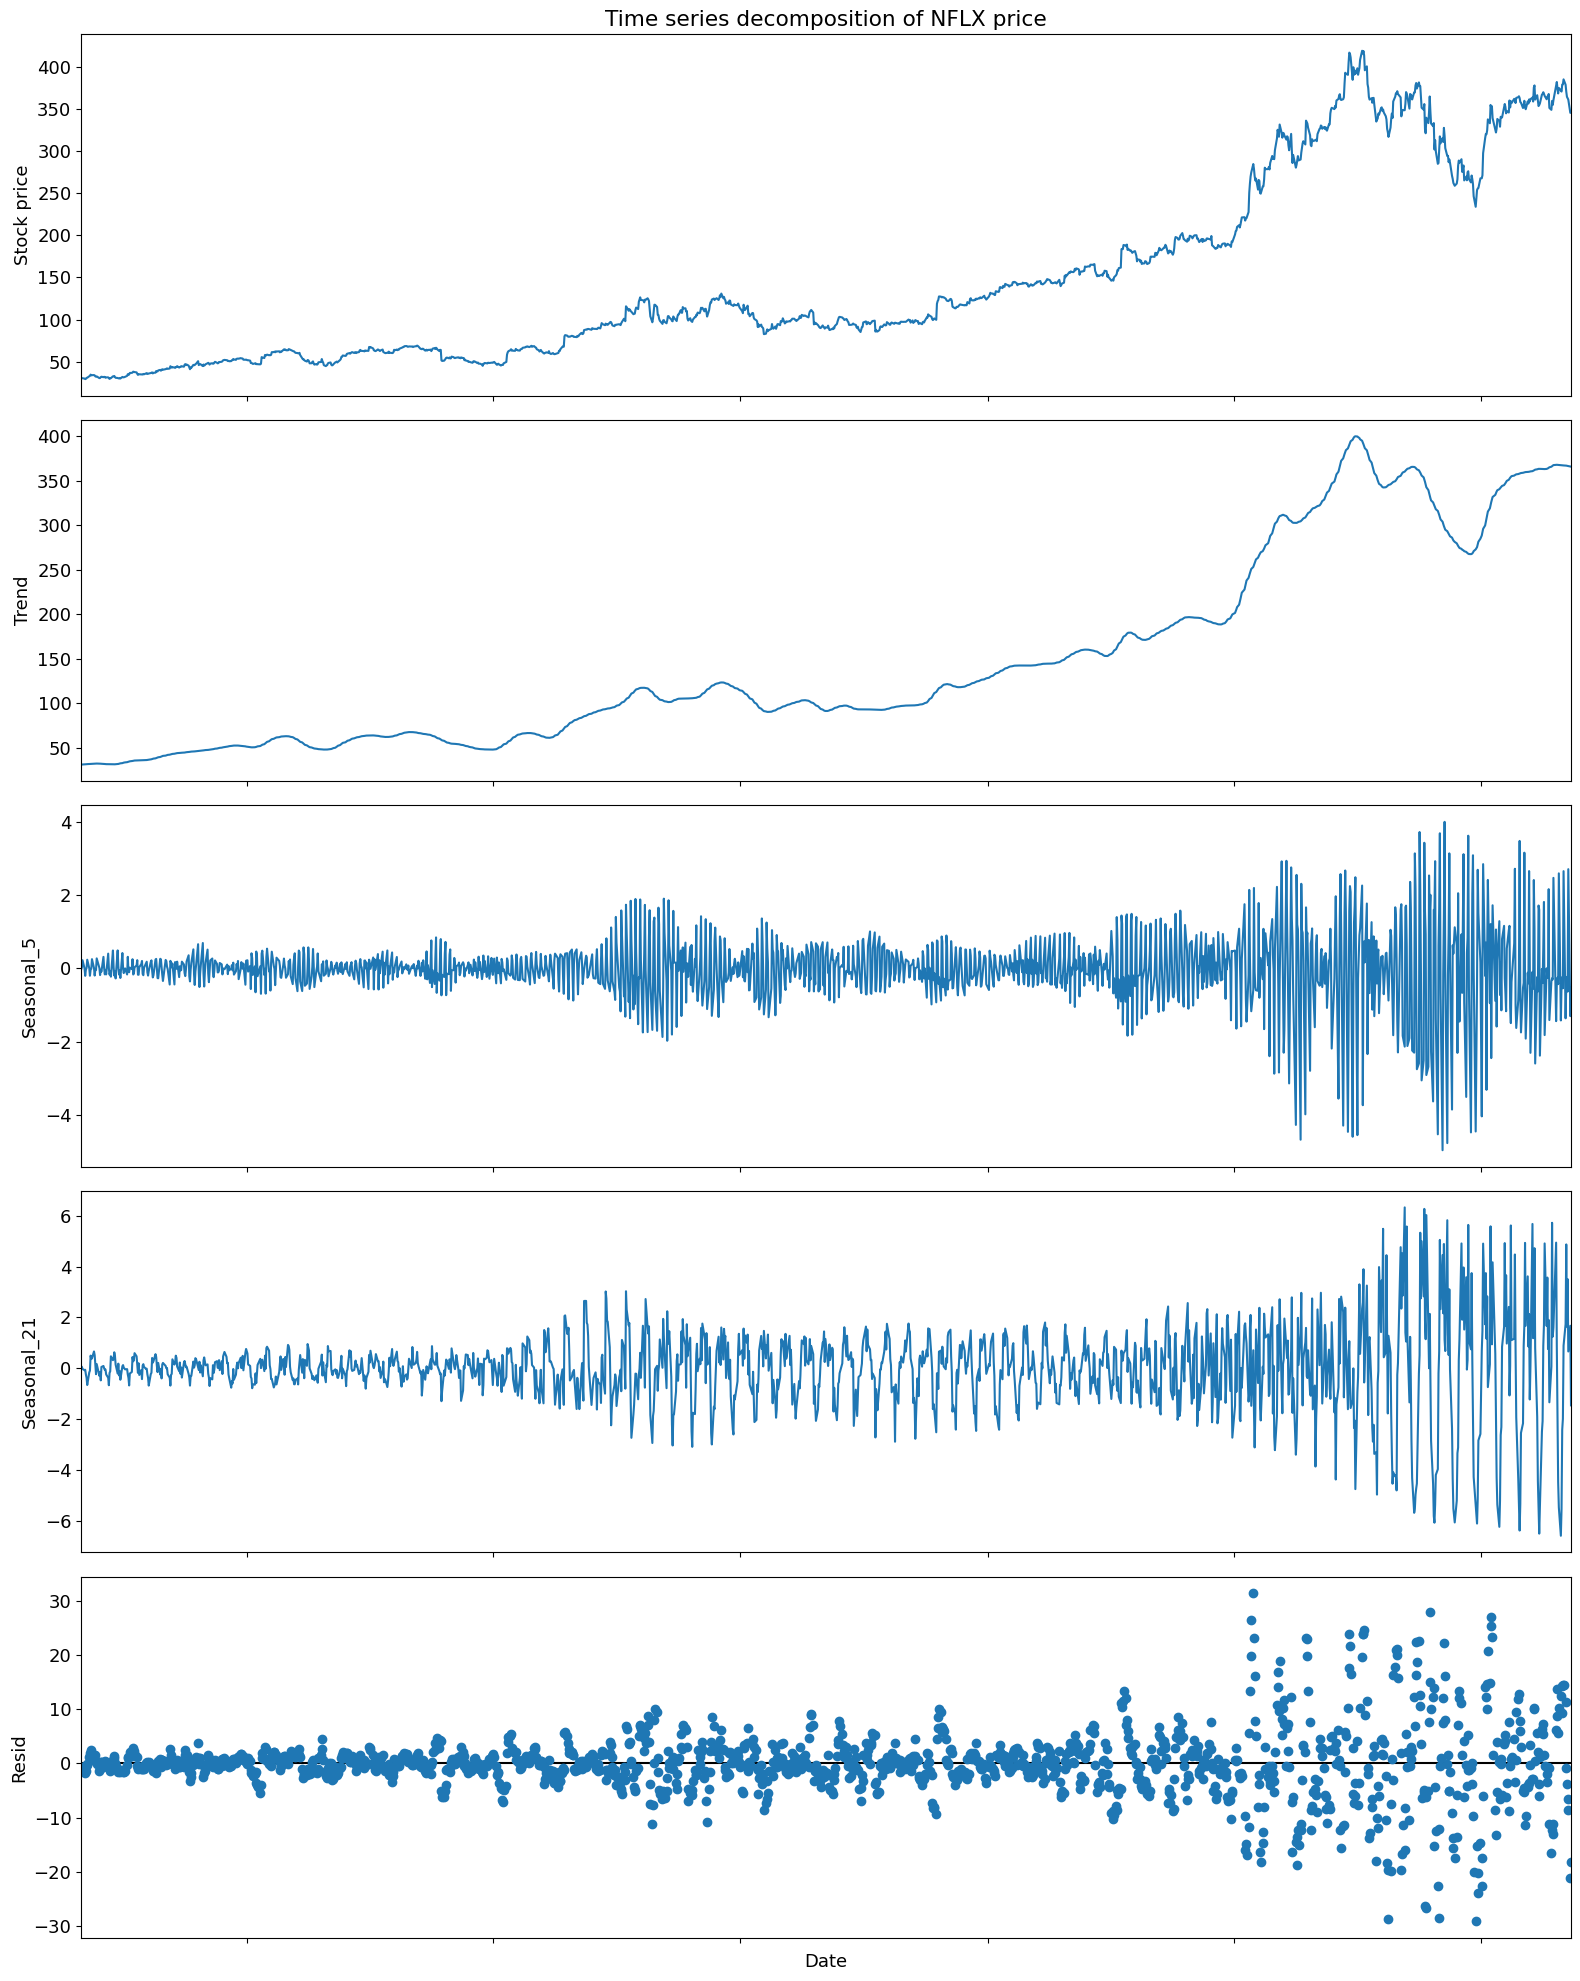

In [41]:
# Start with the plot from the results object `res`
plt.rc("figure", figsize=(16, 20))
plt.rc("font", size=13)
fig = res.plot()

# Make plot pretty
axs = fig.get_axes()

ax_last = axs[-1]
plt.setp(ax_last.get_xticklabels(), rotation=0, horizontalalignment="center")
for ax in axs[:-1]:
    ax.get_shared_x_axes().joined(ax, ax_last)
    ax.set_xticklabels([])
axs[0].set_ylabel("Stock price")
axs[0].set_title("Time series decomposition of NFLX price")
ax_last.set_xlabel("Date")

plt.tight_layout()

In [42]:
# Compute residuals
ts_c = timeseries.copy()
ts_c["residual"] = res.resid

# Compute inter-quartile range
Q1 = ts_c["residual"].quantile(0.25)
Q3 = ts_c["residual"].quantile(0.75)
IQR = Q3 - Q1

# Apply 1.5 IQR as a threshold to identify outliers
factor = 1.5
ts_c["lower"] = Q1 - factor * IQR
ts_c["upper"] = Q3 + factor * IQR
ts_c["is_outlier"] = (ts_c["residual"] < (Q1 - factor * IQR)) | (
    ts_c["residual"] > (Q3 + factor * IQR)
)

NFLX_outl = ts_c[ts_c.is_outlier == True][["NFLX", "is_outlier"]]
NFLX_outl

,NFLX,is_outlier
Date,,
2015-08-17,125.360001,True
2015-08-24,96.879997,True
2015-08-27,117.660004,True
2015-08-28,117.629997,True
2015-08-31,115.029999,True
...,...,...
2019-05-03,385.029999,True
2019-05-06,378.670013,True
2019-05-10,361.040009,True


In [46]:
len(list(set(AMZN_outl.index)&set(DPZ_outl.index)&set(BTC_outl.index)&set(NFLX_outl.index)))

28